In [2]:
from shapely.geometry import Point, LineString, Polygon

def createPointGeom(x_coord, y_coord):
    pnt = Point(x_coord, y_coord)
    return pnt

    
point1 = createPointGeom(1,2) 
point2 = createPointGeom(2,3) 
point3 = createPointGeom(5,4) 

print (point1)
print (point2)
print (point3)

    

POINT (1 2)
POINT (2 3)
POINT (5 4)


In [3]:
def createLineGeom(pnts):
    pnt_list=[]
    for i in pnts:
        if isinstance(i, Point):
            pnt_list.append(i)
        else:
            pnt=Point(i)
            pnt_list.append(pnt)
    return LineString(pnt_list)

# variable "line1" will be used afterwards
line1 = createLineGeom([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
print (line1)
print (createLineGeom([point1, point2, point3]))

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (1 2, 2 3, 5 4)


POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


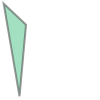

POLYGON ((1 2, 2 3, 5 4, 1 2))


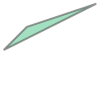

In [4]:
def createPolyGeom(lst):
    l=[]
    # if len(lst)>=3:
    for item in lst:
        if isinstance(item, Point):
            l.append(item)
        else:
            pnt = Point(item)
            l.append(pnt)
 
    return Polygon([[p.x, p.y] for p in l])

pol1 = createPolyGeom([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
pol2 = createPolyGeom([[p.x, p.y] for p in [point1, point2, point3]])

print(pol1)
display(pol1)

print(pol2)
display(pol2)


In [5]:
def getCentroid(input):
    # return input.centroid
    if isinstance(input, list):
        inp_lst=[]
        for i in input:
            if isinstance(i, Point):
                inp_lst.append(input)
        input=LineString(inp_lst)
        return input.centroid
    else: 
        return input.centroid

print(getCentroid(point1))
#print(getCentroid(point1, point2)
      
print(getCentroid(line1))
print(getCentroid(pol1))


POINT (1 2)
POINT (6.229961354035622 -11.89241115757239)
POINT (6.22 -7.785333333333334)


In [6]:
def getArea(input):
    if isinstance(input, Polygon):
        pol_area = input.area
        return pol_area 
    else:
        print("Sorry, not a polygon")        
        exit()

print(getArea(pol1))
print()
print(getArea(point1))

86.78900000000002

Sorry, not a polygon
None


In [7]:
def getLength(input):
    # if instance(input, LineString) or isinstance(input, Polygon):
        # input_len=input.length
    if isinstance(input, LineString):
        l_length = input.length
        return l_length
    if isinstance(input, Polygon):
        pol_exter = input.exterior.length
        return pol_exter
    else:
        print("Error: LineString or Polygon geometries required!")
    
        
leng = getLength(point1)
if leng!=None:
    print("The length of your line is " + str(leng))

leng = getLength(line1)
if leng!=None:
    print("The length of your line is " + str(leng))

leng = getLength(pol1)
if leng!=None:
    print("The length of your polygon's exterior is " + str(leng))

Error: LineString or Polygon geometries required!
The length of your line is 52.46106912939557
The length of your polygon's exterior is 62.16395199996553


In [8]:
import pandas as pd
df = pd.read_csv(r'C:\Users\daiga86\geopython\L1\travelTimes_2015_Helsinki.csv', sep=';', encoding='latin1')
pd.set_option('max_columns',6)

def orig(row):
    return Point(row['from_x'], row['from_y'])

def dest(row):
    return Point(row['to_x'], row['to_y'])

df['orig_points'] = df.apply(orig, axis=1)
df['dest_points'] = df.apply(dest, axis=1)

print(df.head(5))
#display(df.head(5))


   from_id    to_id      fromid_toid                  ...                   \
0  5861326  5785640  5861326_5785640                  ...                    
1  5861326  5785641  5861326_5785641                  ...                    
2  5861326  5785642  5861326_5785642                  ...                    
3  5861326  5785643  5861326_5785643                  ...                    
4  5861326  5787544  5861326_5787544                  ...                    

   route_total_lines                    orig_points  \
0                2.0  POINT (24.9704379 60.3119173)   
1                2.0  POINT (24.9704379 60.3119173)   
2                2.0  POINT (24.9704379 60.3119173)   
3                2.0  POINT (24.9704379 60.3119173)   
4                2.0  POINT (24.9704379 60.3119173)   

                            dest_points  
0         POINT (24.8560344 60.3999406)  
1         POINT (24.8605682 60.4000135)  
2          POINT (24.865102 60.4000863)  
3         POINT (24.8696358 60.4

In [9]:
def linstr(row): 
    return LineString([row['orig_points'], row['dest_points']])

def leng(row):
    return row['lines'].length
     
df['lines'] = df.apply(linstr, axis=1)
df['length'] = df.apply(leng, axis=1)

print(df.head(5))
print()
print("The average length of the distance between origin and destination is ", df['length'].mean(axis=0))

   from_id    to_id      fromid_toid    ...     \
0  5861326  5785640  5861326_5785640    ...      
1  5861326  5785641  5861326_5785641    ...      
2  5861326  5785642  5861326_5785642    ...      
3  5861326  5785643  5861326_5785643    ...      
4  5861326  5787544  5861326_5787544    ...      

                            dest_points  \
0         POINT (24.8560344 60.3999406)   
1         POINT (24.8605682 60.4000135)   
2          POINT (24.865102 60.4000863)   
3         POINT (24.8696358 60.4001589)   
4  POINT (24.8425817 60.39747779999999)   

                                               lines    length  
0  LINESTRING (24.9704379 60.3119173, 24.8560344 ...  0.144348  
1  LINESTRING (24.9704379 60.3119173, 24.8605682 ...  0.140827  
2  LINESTRING (24.9704379 60.3119173, 24.865102 6...  0.137366  
3  LINESTRING (24.9704379 60.3119173, 24.8696358 ...  0.133969  
4  LINESTRING (24.9704379 60.3119173, 24.8425817 ...  0.153843  

[5 rows x 17 columns]

The average length of the 